<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch1_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create the dataset and download it**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set the random seed for reproducibility
np.random.seed(42)

# Create the dataset
customer_id = np.arange(1, 201)
gender = np.random.choice(['Male', 'Female'], size=200)
age = np.random.normal(loc=40, scale=10, size=200).astype(int)
annual_income = np.random.normal(loc=60, scale=15, size=200).astype(int)
score = np.random.randint(1, 101, size=200)

# Create a DataFrame
customers = pd.DataFrame({
    'Customer ID': customer_id,
    'Gender': gender,
    'Age': age,
    'Annual Income (k$)': annual_income,
    'Score (1-100)': score
})

# Introduce missing values for Annual Income (5% of rows)
num_missing_annual_income = int(0.05 * len(customers))
missing_indices = np.random.choice(customers.index, num_missing_annual_income, replace=False)
customers.loc[missing_indices, 'Annual Income (k$)'] = np.nan

# Introduce missing values for 2% of rows, keeping only Customer ID and Age
num_missing_rows = int(0.02 * len(customers))
missing_rows_indices = np.random.choice(customers.index, num_missing_rows, replace=False)
customers.loc[missing_rows_indices, ['Gender', 'Annual Income (k$)', 'Score (1-100)']] = np.nan

# Save the dataset to an CSV file
customers.to_csv('customers.csv', index=False) # Set index=False to avoid including the index in the CSV file
# Download the created CSV file
files.download('customers.csv')
# Display the first few rows of the dataset
print(customers.head(10))
print(customers.info())
print(customers.describe())
print(customers.isnull().sum())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0            1    Male   40                62.0           14.0
1            2  Female   37                50.0           59.0
2            3    Male   40                61.0           56.0
3            4    Male   20                54.0            7.0
4            5    Male   37                61.0            3.0
5            6  Female   43                 NaN           23.0
6            7    Male   54                83.0           18.0
7            8    Male   34                41.0           38.0
8            9    Male   31                91.0           99.0
9           10  Female   34                30.0           15.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         200 non-null    int64  
 1   Gender              196 non-null    object 
 2   Ag

**Step 1: Load the dataset**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Replace 'your_correct_url.csv' with the actual URL of your CSV file
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/customers.csv'

# Read the CSV file into a Pandas DataFrame (assuming no header row)
customers = pd.read_csv(url, header=None, names=["Customer ID",	"Gender",	"Age",	"Annual Income (k$)",	"Score (1-100)"])  # Adjust header row if needed
print(customers) # Display the first few rows of the dataset
print(customers.info())
print(customers.describe())

     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
1              1    Male   40                  62             14
2              2  Female   37                  50             59
3              3    Male   40                  61             56
4              4    Male   20                  54              7
..           ...     ...  ...                 ...            ...
196          196  Female   25                  25             51
197          197  Female   51                  37             72
198          198  Female   40                  80             42
199          199    Male   30                  84             64
200          200    Male   44                  56             15

[201 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ---

**Step 2: Identify Missing Values**


In [28]:
# Identify missing values
missing_values = customers.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

Missing values before imputation:
Customer ID            0
Gender                 4
Age                    0
Annual Income (k$)    14
Score (1-100)          4
dtype: int64


**Step 3: Impute Missing Values with Mean Value**

In [31]:
# Impute missing values with the mean value
customers_imputed = customers.copy()

# Convert 'Annual Income (k$)' to numeric, handling errors
customers_imputed['Annual Income (k$)'] = pd.to_numeric(customers_imputed['Annual Income (k$)'], errors='coerce')
# Convert 'Score (1-100)' to numeric, handling errors
customers_imputed['Score (1-100)'] = pd.to_numeric(customers_imputed['Score (1-100)'], errors='coerce') # Convert 'Score' column to numeric

mean_income = customers_imputed['Annual Income (k$)'].mean()
mean_score = customers_imputed['Score (1-100)'].mean()

# Show rows with missing values before imputation
missing_before = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values before imputation:")
print(missing_before)

# Impute missing values
customers_imputed['Annual Income (k$)'].fillna(mean_income, inplace=True)
customers_imputed['Score (1-100)'].fillna(mean_score, inplace=True)

# Show rows with missing values after imputation
missing_after = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values after imputation:")
print(missing_after)

Rows with missing values before imputation:
     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0    Customer ID  Gender  Age                 NaN            NaN
6              6  Female   43                 NaN           23.0
28            28     NaN   31                 NaN            NaN
39            39    Male   38                 NaN           52.0
84            84  Female   46                 NaN            8.0
102          102  Female   54                 NaN           64.0
105          105  Female   46                 NaN           11.0
116          116     NaN   48                 NaN            NaN
121          121  Female   31                 NaN           84.0
124          124    Male   28                 NaN           73.0
134          134     NaN   78                 NaN            NaN
137          137    Male   49                 NaN           60.0
141          141     NaN   32                 NaN            NaN
160          160  Female   46                 

**Step 4: Remove Rows or Columns with High Percentage of Missing Values**

In [32]:
# Remove rows with more than 50% missing values
customers_cleaned = customers_imputed.dropna(thresh=customers.shape[1] * 0.5)

# Show rows affected by removal
removed_rows = customers_imputed[~customers_imputed.index.isin(customers_cleaned.index)]
print("Rows removed due to high percentage of missing values:")
print(removed_rows)

# Save the cleaned dataset to an Excel file
customers_cleaned.to_excel('customers_cleaned.xlsx', index=False)

Rows removed due to high percentage of missing values:
Empty DataFrame
Columns: [Customer ID, Gender, Age, Annual Income (k$), Score (1-100)]
Index: []


**Step 5: Visualize Missing Data**

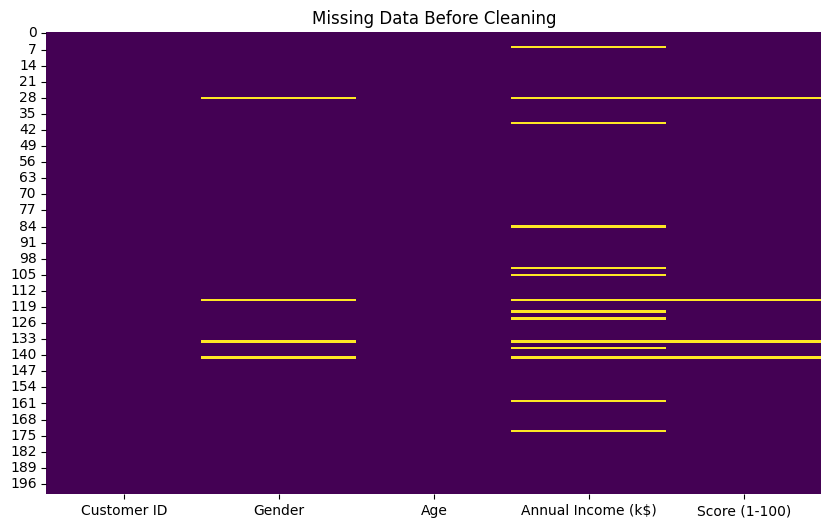

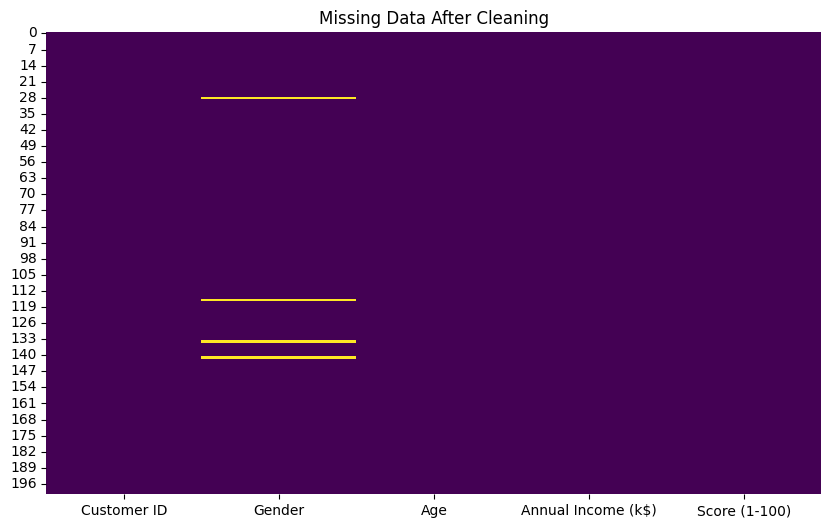

In [33]:
# Visualize missing data before cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Before Cleaning')
plt.show()

# Visualize missing data after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Cleaning')
plt.show()
